In [ ]:
import sys, os, pathlib
sys.path.append("/root/shared/gitrepos/smart-nanopillars/utils")
sys.path.append("/root/shared/gitrepos/smart-comp-sci/mechanotransduction-example")
import smart_analysis
from mechanotransduction_ode import mechanotransduction_ode_calc
from matplotlib import pyplot as plt
import matplotlib
params = {'axes.labelsize': 12,
            'axes.titlesize': 12,
            'legend.fontsize': 9,
            'xtick.labelsize':10,
            'ytick.labelsize': 10,
            'figure.figsize': (5.5,4),
            'pdf.fonttype': 42,
            'ps.fonttype': 42,
            'axes.spines.top': False,
            'axes.spines.right': False,
            'legend.loc': "best"}
matplotlib.rcParams.update(params)
import numpy as np
cur_dir = "/root/shared/gitrepos/smart-nanopillars"

In [ ]:
import re
mesh_dir = "/root/scratch/nanopillar-sims/meshes/nanopillars_new"
if True:#"results-redo" not in os.listdir(cur_dir):
    files_dir = "/root/scratch/nanopillar-sims/results_nanopillars_indentation_poreTesting_REDOLONGER"
    npy_dir = pathlib.Path("/root/shared/gitrepos/smart-nanopillars/analysis_data/npy-files-nanopillars-porelonger")
    npy_dir.mkdir(exist_ok=True)
    test_folders = os.listdir(files_dir)
    condition_str = []
    for i in range(0,len(test_folders)):
        # if not (("loc0" in test_folders[i]) and ("rate1_" in test_folders[i])):
        #     continue
        for folder in os.listdir(mesh_dir):
            if folder in test_folders[i]:
                mesh_file = f"{mesh_dir}/{folder}/spreadCell_mesh.h5"
                break
        if mesh_file == "":
            Warning("Mesh could not be found, skipping to next case")
            condition_str.append("")
            continue
        results_folder = f"{files_dir}/{test_folders[i]}"
        condition_cur = test_folders[i]
        condition_str.append(condition_cur)
        if mesh_file=="" or results_folder=="":
            ValueError("Folders do not match expected structure for analysis")
        height = 3.0
        zmax_nuc = 6.4
        if "loc" in test_folders[i]:
            loc = float(re.findall(r"loc.*?_", test_folders[i])[0][3:-1])
        else:
            loc = 0
        tests = ["all"]#,"center_low","center_high"]
        center_low = [loc-1, -1, 0, loc+1, 1, height+1]
        center_high = [loc-1, -1, zmax_nuc-1.0, loc+1, 1, zmax_nuc+10]
        domains = [[], center_low, center_high]
        for sd in range(len(domains)):
            try:
                tVec, results_all = smart_analysis.analyze_all(
                    mesh_file=mesh_file, results_path=results_folder, display=False, axisymm=False,
                    subdomain=domains[sd])
            except:
                Warning("error in analysis, skipping to next case")
                continue
            results_all.insert(0, tVec) # add time as first element in list
            max_length = len(tVec)
            for j in range(len(results_all)):
                if len(results_all[j]) > max_length:
                    max_length = len(results_all[j])
            for j in range(len(results_all)):
                num_zeros = max_length - len(results_all[j])
                for k in range(num_zeros):
                    results_all[j].append(0)
            np.save(npy_dir / f"{condition_cur}_results_{tests[sd]}.npy", results_all)

ROOT -2024-09-10 00:52:31,111 fontTools.subset - INFO - maxp pruned (__init__.py:2783)
ROOT -2024-09-10 00:52:31,133 fontTools.subset - INFO - cmap pruned (__init__.py:2783)
ROOT -2024-09-10 00:52:31,134 fontTools.subset - INFO - kern dropped (__init__.py:2767)
ROOT -2024-09-10 00:52:31,135 fontTools.subset - INFO - post pruned (__init__.py:2783)
ROOT -2024-09-10 00:52:31,136 fontTools.subset - INFO - FFTM dropped (__init__.py:2767)
ROOT -2024-09-10 00:52:31,143 fontTools.subset - INFO - GPOS pruned (__init__.py:2783)
ROOT -2024-09-10 00:52:31,150 fontTools.subset - INFO - GSUB pruned (__init__.py:2783)
ROOT -2024-09-10 00:52:31,153 fontTools.subset - INFO - name pruned (__init__.py:2783)
ROOT -2024-09-10 00:52:31,166 fontTools.subset - INFO - glyf pruned (__init__.py:2783)
ROOT -2024-09-10 00:52:31,168 fontTools.subset - INFO - Added gid0 to subset (__init__.py:2823)
ROOT -2024-09-10 00:52:31,169 fontTools.subset - INFO - Added first four glyphs to subset (__init__.py:2831)
ROOT -2024

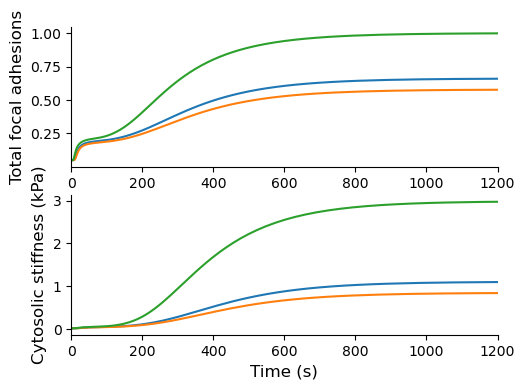

In [200]:
from smart import mesh_tools
import dolfin as d
stiffness_vec = [0.1, 5.7, 70000000.0]
radiusArray= [
 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
 0.5, 0.25, 0.5, 0.25,
 0.0, 0.0, 0.0, 0.0, 0.0]
pitchArray= [
 5.0, 2.5, 1.0, 5.0, 2.5, 1.0,
 5.0, 2.5, 5.0, 2.5,
 0.0, 0.0, 0.0, 0.0, 0.0]
heightArray=[
 1.0, 1.0, 1.0, 3.0, 3.0, 3.0,
 1.0, 1.0, 3.0, 3.0,
 0.0, 0.0, 0.0, 0.0, 0.0]
cellRadArray=[
 20.25, 18.52, 16.55, 19.93, 18.04, 15.39,
 20.01, 17.45, 18.06, 17.64,
 22.48, 18.08, 15.39, 14.18, 12.33]
EModArray=[
 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 
 10000000, 10000000, 10000000, 10000000,
 10000000, 14, 7, 3, 1]
tests_idx = [1,7,10]
yapData = [
 2.697152, 2.223328, 2.084372, 2.669816, 2.360008, 2.079816,
 2.55696, 2.264736, 2.456508, 2.365188,
 3.320408, 2.285056, 1.806156, 1.555306, 1.43672
]
yapStdData = [
    0.100232, 0.063784, 0.054732, 0.09112, 0.072896, 0.054732,
    0.073056, 0.036528, 0.063924, 0.063924,
    0.04561, 0.04561, 0.036488, 0.031922, 0.041044
]
curv0Array=[5, 10, 0, 0, 0, 2, 1]
nprateArray=[1, 1, 1, 0.3, 0, 1, 1]
var_names_saved = ["Cofilin_NP", "FActin", "GActin", "LaminA", "LIMK_A", "mDia_A", 
                   "Myo_A", "NPC_A", "pFAK", "RhoA_GDP", "RhoA_GTP", "ROCK_A", "Substrate_A", "YAPTAZ", "YAPTAZ_nuc", "YAPTAZ_phos"]
plot_names = ["YAPTAZ_phos", "YAPTAZ", "YAPTAZ_nuc"]
results_idx = []
for name in plot_names:
    results_idx.append(var_names_saved.index(name) + 1) # add one because time is first el
pFAK_idx = var_names_saved.index("pFAK") + 1
RhoA_idx = var_names_saved.index("ROCK_A") + 1
FActin_idx = var_names_saved.index("FActin") + 1
Myo_idx = var_names_saved.index("Myo_A") + 1

fig, ax = plt.subplots(2,1)

YAPTAZ_ratios = np.zeros([len(cellRadArray), len(curv0Array)])
errors = np.zeros([len(cellRadArray), len(curv0Array)])

for i in tests_idx:#[0, 1, 2, 6, 7, 10, 11, 12, 13, 14]:
    loaded_cur = mesh_tools.load_mesh(pathlib.Path(f"/root/shared/gitrepos/smart-comp-sci-data/meshes/nanopillars/nanopillars_h{heightArray[i]}_p{pitchArray[i]}_r{radiusArray[i]}_cellRad{cellRadArray[i]}") / "spreadCell_mesh.h5")
    PM_area = d.assemble(1.0*d.Measure("dx", d.create_meshview(loaded_cur.mf_facet, 10)))
    cyto_vol = d.assemble(1.0*d.Measure("dx", d.create_meshview(loaded_cur.mf_cell, 1)))
    if i >= 10:
        file_cur = f"{cur_dir}/analysis_data/npy-files-nanopillars/nanopillars_h{heightArray[i]}_p{pitchArray[i]}_r{radiusArray[i]}_cellRad{cellRadArray[i]}_results.npy"
        results_cur = np.load(file_cur)
        YAPphos = results_cur[results_idx[0]]
        YAPnp = results_cur[results_idx[1]]
        YAPnuc = results_cur[results_idx[2]]
        YAPratio = YAPnuc / (YAPphos + YAPnp)
        YAPTAZ_ratios[i][0] = YAPratio[-1]
        pFAK = results_cur[pFAK_idx]
        RhoA_GTP = results_cur[RhoA_idx]
        RhoA_GTP *= PM_area
        FActin = results_cur[FActin_idx]
        MyoA = results_cur[Myo_idx]
        # errors[i][0] = (YAPratio[-1] - yapData[i])**2
        ax[0].plot(results_cur[0], FActin*MyoA/548.444,#YAPratio,
                 label=f"h{heightArray[i]}_p{pitchArray[i]}_r{radiusArray[i]}_cellRad{cellRadArray[i]}")
        ax[1].plot(results_cur[0], 9e-6*FActin**2.6)
    else:
        for j in [0]:#range(len(curv0Array)):
            try:
                file_cur = f"{cur_dir}/analysis_data/npy-files-nanopillars/nanopillars_h{heightArray[i]}_p{pitchArray[i]}_r{radiusArray[i]}_cellRad{cellRadArray[i]}_nprate{nprateArray[j]}_curvSens{curv0Array[j]}_NPCDensityCorrection_results.npy"
                results_cur = np.load(file_cur)
            except:
                file_cur = f"{cur_dir}/analysis_data/npy-files-nanopillars/nanopillars_h{heightArray[i]}_p{pitchArray[i]}_r{radiusArray[i]}_cellRad{cellRadArray[i]}_nprate{nprateArray[j]}_curvSens{curv0Array[j]}_results.npy"
                results_cur = np.load(file_cur)
            YAPphos = results_cur[results_idx[0]]
            YAPnp = results_cur[results_idx[1]]
            YAPnuc = results_cur[results_idx[2]]
            YAPratio = YAPnuc / (YAPphos + YAPnp)
            YAPTAZ_ratios[i][j] = YAPratio[-1]
            errors[i][j] = (YAPratio[-1] - yapData[i])**2 / yapStdData[i]**2
            pFAK = results_cur[pFAK_idx]
            RhoA_GTP = results_cur[RhoA_idx]
            RhoA_GTP *= PM_area
            FActin = results_cur[FActin_idx]
            MyoA = results_cur[Myo_idx]
            ax[0].plot(results_cur[0], FActin*MyoA/548.444,#YAPratio,
                    label=f"h{heightArray[i]}_p{pitchArray[i]}_r{radiusArray[i]}_cellRad{cellRadArray[i]}_nprate{nprateArray[j]}_curvSens{curv0Array[j]}")
            ax[1].plot(results_cur[0], 9e-6*FActin**2.6)
            # plt.plot(results_cur[0], yapData[i]*np.ones_like(results_cur[0]), linestyle="dashed",
            #         label=f"h{heightArray[i]}_p{pitchArray[i]}_r{radiusArray[i]}_cellRad{cellRadArray[i]}_nprate{nprateArray[j]}_curvSens{curv0Array[j]}")

# plt.legend()
ax[0].set_ylabel("Total focal adhesions")
ax[0].set_xlabel('Time (s)')
ax[0].set_xlim([0, 1200])
ax[1].set_ylabel("Cytosolic stiffness (kPa)")
ax[1].set_xlabel('Time (s)')
ax[1].set_xlim([0, 1200])
# plt.ylim([0.75, 0.95])
plt.savefig("cytosolic activation.pdf", format="pdf")

Text(0.5, 0, 'Curvature sensitivity')

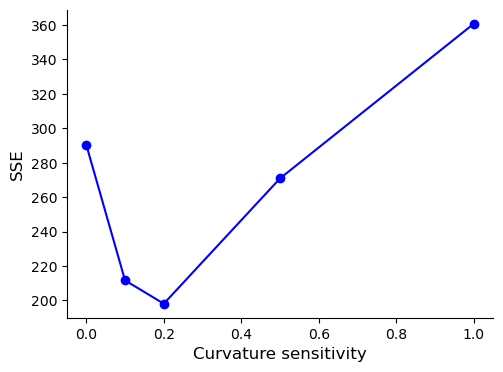

In [179]:
curvSens = [0, 1/10, 1/5, 1/2, 1]
errorsSel = [np.sum(errors[:,2]), np.sum(errors[:,1]), np.sum(errors[:,0]),
             np.sum(errors[:,5]), np.sum(errors[:,6])]
plt.plot(curvSens, errorsSel, 'bo-')
plt.ylabel("SSE")
plt.xlabel("Curvature sensitivity")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

conditions = []
# conditions.append("Flat 10 GPa")
for i in [10,0, 1, 2, 6, 7]:
    conditions.append(f"h{heightArray[i]}p{pitchArray[i]}r{radiusArray[i]}")
# conditions.append("Flat 14 kPa")
# conditions.append("Flat 7 kPa")
# conditions.append("Flat 3 kPa")
# conditions.append("Flat 1 kPa")
YAPTAZ_expt = np.array(yapData)
YAPTAZ_expt_std = np.array(yapStdData)
np_means = {
    'Experiments': YAPTAZ_expt[[10,0,1,2,6,7]],
    # 'No curv sens': YAPTAZ_ratios[[0,1,2,6,7],2],
    # 'Low curv sens': YAPTAZ_ratios[[0,1,2,6,7],1],
    'Mod. curv sens': YAPTAZ_ratios[[10,0,1,2,6,7],0],
    # 'High curv sens': YAPTAZ_ratios[[0,1,2,6,7],5],
}

x = np.arange(len(conditions))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(7,4))

for attribute, measurement in np_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

ax.errorbar(x, YAPTAZ_expt[[10,0,1,2,6,7]], YAPTAZ_expt_std[[10,0,1,2,6,7]], linestyle='None', color="r", capsize=4)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('YAP/TAZ N/C')
ax.set_xticks(x + width/2, conditions)
ax.legend()#loc='upper right')
plt.ylim([0.0, 3.5])
plt.savefig("bargraphnew.pdf", format="pdf")

In [ ]:
stretch_vals = np.linspace(0.1, 10, 200)
plt.loglog(stretch_vals, np.ones_like(stretch_vals),label='no stretch sens.')
plt.loglog(stretch_vals, np.exp((stretch_vals-1)/2.5),label='high stretch sens.')
plt.loglog(stretch_vals, np.exp((stretch_vals-1)/5.0), label='moderate stretch sens.')
plt.loglog(stretch_vals, np.exp((stretch_vals-1)/7.5), label='low stretch sens.')

plt.xlabel('Stretch ratio')
plt.ylabel('Relative import rate')
plt.legend()
plt.savefig("/root/shared/gitrepos/smart-comp-sci-data/pyplots/nanopillars/stretch_transport.pdf", format="pdf")

In [ ]:
stiffness_vec = [0.1, 5.7, 70000000.0]
radius=0.5
pitch=3.5
height=3.0
cellRad=15.5
EMod=10000000
# indentationArray = [0.0, 0.2, 0.4, 0.6, 0.8, 
#                     1.0, 1.2, 1.4, 1.6, 1.8, 
#                     2.0, 2.2, 2.4, 2.6, 2.8]
indentationArray = [0.0, 0.4, 0.8, 
                    1.0, 1.4, 1.8, 
                    2.0, 2.4, 2.8]
u0Array=[0, 2.5, 5.0, 7.5]
var_names_saved = ["Cofilin_NP", "FActin", "GActin", "LaminA", "LIMK_A", "mDia_A", 
                   "Myo_A", "NPC_A", "pFAK", "RhoA_GDP", "RhoA_GTP", "ROCK_A", 
                   "Substrate_A", "YAPTAZ", "YAPTAZ_nuc", "YAPTAZ_phos"]
plot_name = "FActin"
results_idx = var_names_saved.index(plot_name) + 1 # add one because time is first el
plot_names = ["YAPTAZ_phos", "YAPTAZ", "YAPTAZ_nuc"]
results_idx = []
for name in plot_names:
    results_idx.append(var_names_saved.index(name) + 1) # add one because time is first el

fig, ax = plt.subplots()

YAPTAZ_ratios = np.zeros([len(u0Array), len(indentationArray)])

for i in range(len(u0Array)):
    for j in range(len(indentationArray)):
        for domain in ["all"]:
            file_cur = (f"{cur_dir}/analysis_data/npy-files-nanopillars-stretchspatial"
                    f"/nanopillars_indent{indentationArray[j]}_u0_{u0Array[i]}_results_{domain}.npy")
            try:
                results_cur = np.load(file_cur)
            except:
                    continue
            if u0Array[i] > 0: # then additional u0 variable included 
                YAPphos = results_cur[results_idx[0]+1]
                YAPnp = results_cur[results_idx[1]+1]
                YAPnuc = results_cur[results_idx[2]+1]
            else:
                YAPphos = results_cur[results_idx[0]]
                YAPnp = results_cur[results_idx[1]]
                YAPnuc = results_cur[results_idx[2]]
            YAPratio = YAPnuc / (YAPphos + YAPnp)
            YAPTAZ_ratios[i][j] = YAPratio[-1]
            if u0Array[i] == 5.0 and indentationArray[j] == 1.8:
                YAPTAZ_ratio_ref = YAPratio[-1]
                YAPTAZ_dyn_ref = [results_cur[0], YAPratio]
                NPC_ref = results_cur[8][-1]
                phiRef = YAPphos[-1]/(YAPphos[-1] + YAPnp[-1])
            if domain=="center_low":
                plt.plot(results_cur[0], YAPratio,
                    label=f"indent{indentationArray[j]}_u0_{u0Array[i]} low", linestyle="dashed")
            else:
                plt.plot(results_cur[0], YAPratio,
                label=f"indent{indentationArray[j]}_u0_{u0Array[i]}")
# plt.legend()
plt.ylabel("YAP/TAZ N/C")
plt.xlabel('Time (s)')
plt.legend()
plt.xlim([0, 3600])
# plt.ylim([2.9, 3.2])
# plt.savefig("YAPTAZ_withcompression.pdf", format="pdf")

In [ ]:
selIdx1 = np.array([0,1,3,4,5,6,7,8])
plt.plot(np.array(indentationArray)[selIdx1], YAPTAZ_ratios[0][selIdx1], marker="o",label="no stretch sensitivity")
plt.plot(indentationArray, YAPTAZ_ratios[1], marker="o", label="with highly stretch sensitive NPCs")
plt.plot(indentationArray, YAPTAZ_ratios[2], marker="o", label="with moderately stretch sensitive NPCs")
plt.plot(indentationArray, YAPTAZ_ratios[3], marker="o", label="with low stretch sensitive NPCs")
# plt.ylim([2, 3])
# plt.xlim([-.05, 1.55])
plt.xlabel("Indentation (μm)")
plt.ylabel("YAP/TAZ N/C")
plt.legend()
plt.savefig("indentation_NCsummary.pdf", format="pdf")

In [ ]:
stiffness_vec = [0.1, 5.7, 70000000.0]
radius=0.5
pitch=3.5
height=3.0
cellRad=15.5
EMod=10000000

indentation = 1.8#[0.8, 1.8, 2.8]
poreLocArray= [0.0, 0.0, 0.0]#, 3.5, 3.5, 3.5]
poreSizeArray=[0.1, 0.2, 0.5]#, 0.1, 0.2, 0.5]
poreRateArray=[1, 100]
transportRateArray=[100, 100, 100, 1000, 1000, 1000]
transportRatioArray=[1, 3, 10, 1, 3, 10]

var_names_saved = ["uNPC", "YAPTAZ", "YAPTAZ_nuc", "YAPTAZ_nuc_phos", "YAPTAZ_phos"]
plot_names = ["YAPTAZ_phos", "YAPTAZ", "YAPTAZ_nuc", "YAPTAZ_nuc_phos"]
results_idx = []
for name in plot_names:
    results_idx.append(var_names_saved.index(name) + 1) # add one because time is first el
fig, ax = plt.subplots()

pore_dir = f"{cur_dir}/analysis_data/npy-files-nanopillars-porelonger"

YAPTAZ_ratios = np.zeros([len(poreSizeArray),len(poreRateArray),len(transportRateArray)])

for i in range(len(poreSizeArray)):
    for j in range(len(poreRateArray)):
        for k in range(len(transportRateArray)):
            loc = ["all"]
            for l in loc:
                cur_file = (f"nanopillars_indent{indentation}_pore_size{poreSizeArray[i]}_"
                        f"loc{poreLocArray[i]}_rate{poreRateArray[j]}_transport{transportRateArray[k]}_"
                        f"ratio{transportRatioArray[k]}_results_all.npy")
                cur_file = f"{pore_dir}/{cur_file}"
                try:
                    results_cur = np.load(cur_file)
                except:
                    continue
                YAPphos = results_cur[results_idx[0]]
                YAPnp = results_cur[results_idx[1]]
                YAPnuc = results_cur[results_idx[2]]
                YAPphos_nuc = results_cur[results_idx[3]]
                YAPratio = (YAPnuc + YAPphos_nuc) / (YAPphos + YAPnp)
                if l == "center_low":
                    # print("blank")
                    plt.plot(results_cur[0]/3600, YAPratio, label=f"Entry/exit ratio = {transportRatioArray[k]}", linestyle="dashed")
                elif l == "all":
                    plt.plot(results_cur[0]/3600, YAPratio, label=f"Entry/exit ratio = {transportRatioArray[k]}")
                YAPTAZ_ratios[i][j][k] = YAPratio[-1]
tPlot = np.concatenate((YAPTAZ_dyn_ref[0]/3600, [3.0]))
YPlot = np.concatenate((YAPTAZ_dyn_ref[1], [YAPTAZ_dyn_ref[1][-1]]))
plt.plot(tPlot, YPlot, linestyle="dashed", label="no pore")
plt.legend()
plt.ylabel("YAP/TAZ N/C")
plt.xlabel('Time (h)')
# plt.title("Slow entry through pore")
plt.xlim([0, 3])
# plt.ylim([0, 7.5])
# plt.savefig("YAPTAZ_poreDynamics_0.5pore.pdf", format="pdf")

In [ ]:
plt.plot(np.array(transportRatioArray[0:3]), YAPTAZ_ratios[1][0][0:3], marker="o",label="slow entry through pore")
plt.plot(np.array(transportRatioArray[3:]), YAPTAZ_ratios[1][0][3:], marker="o",label="fast entry through pore")
plt.plot(np.array(transportRatioArray[0:3]), YAPTAZ_ratio_ref*np.ones_like(YAPTAZ_ratios[2][1][0:3]), 
         linestyle="dashed",label="no pore")
# theoretical predictions for well mixed
ratios = np.linspace(1, 10, 100)
kin = 1.0 + 10.0*NPC_ref
kin = kin*1.825
kout = 1
kout_pore = 1000
kin_pore = kout_pore*ratios
SAnuc = 390
SApore = np.pi*.2**2
phiPhos = phiRef
# pred1 = ratios*(kin*(1+zeta1-phiRef) + kout*ratios*phiRef)/(zeta1*kin + kout*ratios)
correction = 1# - np.exp(-SApore*kin_pore*10000/(550*602.2))
pred1 = correction*ratios*phiPhos + (SAnuc*kin*(1-phiPhos) + SApore*kin_pore*(1-phiPhos))/(SAnuc*kout + SApore*kout_pore)
# pred1 = (SAnuc*kin*(1-phiPhos) + SApore*kin_pore*(1-phiPhos))/(SAnuc*kout + SApore*kout_pore)
plt.plot(ratios, pred1, label="Well-mixed prediction")
# plt.plot(np.array(transportRatioArray[0:3]), YAPTAZ_ratios[0][1][0:3], marker="o",label="transport = 10")
# plt.plot(np.array(transportRatioArray[3:]), YAPTAZ_ratios[0][1][3:], marker="o",label="transport = 100")
# plt.ylim([2, 3])
# plt.xlim([-.05, 1.55])
plt.xlabel("Transport ratio")
plt.ylabel("YAP/TAZ N/C")
plt.legend()

In [ ]:
SAref = np.pi*0.1**2
rate_eff = np.array([100*SAref, 100*SAref*4, 1000*SAref, 100*SAref*25, 1000*SAref*4, 1000*SAref*25])
ratios = np.array([1,3,10])
xGrid, yGrid = np.meshgrid(rate_eff, ratios)
YAPTAZGrid = np.ones_like(xGrid)
for i in [0,1,2]:#range(len(poreSizeArray)):
    for j in [0]:#range(len(poreRateArray)):
        for k in [0,1,2,3,4,5]:#range(len(transportRateArray)):
            rate_eff_cur = transportRateArray[k]*np.pi*poreSizeArray[i]**2
            ratio_cur = transportRatioArray[k]
            idx = np.nonzero(np.logical_and(np.isclose(xGrid, rate_eff_cur), yGrid==ratio_cur))
            YAPTAZGrid[idx] = YAPTAZ_ratios[i][j][k]
from matplotlib import pyplot as plt
# ax = plt.axes(projection ='3d')
cmap_cur = plt.get_cmap('viridis')
# YAPTAZNorm = (YAPTAZGrid - np.min(YAPTAZGrid))/(np.max(YAPTAZGrid)-np.min(YAPTAZGrid))
# surf = ax.plot_surface(np.log(xGrid), np.log(yGrid), np.zeros_like(xGrid), 
#                        facecolors=cmap_cur(YAPTAZNorm),
#                        cmap = cmap_cur, edgecolor = 'none')
# ax.view_init(90, 0)
# plt.colorbar(surf)
ax = plt.axes()
im = plt.imshow(YAPTAZGrid.transpose(), cmap = cmap_cur)
ax.set_ylim(-0.5, 5.5)
plt.colorbar(im)
plt.xlabel('Ratio')
ax.set_xticks([0,1,2,], labels=['1','3','10'])
plt.ylabel('Transport rate')
ax.set_yticks([0,1,2,3,4,5], labels=['3.142','12.57','31.42','78.54','125.7','785.4'])
plt.savefig("pore_phase_diagram.pdf", format="pdf")

In [ ]:
import dolfin as d
from smart import mesh_tools
import pathlib
import numpy as np
loaded = mesh_tools.load_mesh(pathlib.Path("/root/scratch/nanopillar-sims/meshes/nanopillars_new_hNPRefined/nanopillars_indent2.8") / "spreadCell_mesh.h5")
mesh_cur = d.create_meshview(loaded.mf_facet, 12)
Vcur = d.FunctionSpace(mesh_cur, "P", 1)
xShift = 0.0
centerLogic = np.logical_and(np.isclose(mesh_cur.coordinates()[:,0], xShift, 0.1),
               np.logical_and(
               np.isclose(mesh_cur.coordinates()[:,1], 0.),
               mesh_cur.coordinates()[:,2] < 0.8*np.max(mesh_cur.coordinates()[:,2])))
centerIdx = np.nonzero(centerLogic)[0]
centerIdx = centerIdx[np.argmin(np.abs(mesh_cur.coordinates()[centerIdx,0]-xShift))]
zCenter = mesh_cur.coordinates()[centerIdx,2]
tVals = np.linspace(0., 5., 200)
pore_xdmf = d.XDMFFile(d.MPI.comm_world, "pore.xdmf")
pore_xdmf.parameters["flush_output"] = True
t = d.Constant(tVals[0])
poreRad = 0.2
pore_expr = d.Expression(f"(1-exp(-tCur/1.0))*exp(-(pow(x[0]-{xShift},2)+pow(x[1],2)+pow(x[2]-{zCenter},2))/(pow(poreRad,2)))", tCur = t, degree=1, poreRad=poreRad)
pore_fcn = d.interpolate(pore_expr, Vcur)
for i in range(len(tVals)):
    t.assign(tVals[i])
    pore_fcn = d.interpolate(pore_expr, Vcur)
    pore_fcn.rename("pore", "pore")
    pore_xdmf.write(pore_fcn, tVals[i])

In [177]:
import sys
import dolfin as d
sys.path.append("/root/shared/gitrepos/smart-nanopillars/utils")
import spread_cell_mesh_generation as mesh_gen
# dmesh, mf2, mf3 = mesh_gen.create_substrate(nanopillars=[0.5, 3.0, 3.5], hEdge = 0.2, LBox=40)
dmesh, mf2, mf3 = mesh_gen.create_substrate(nanopillars=[0.0, 0.0, 0.0], hEdge = 0.2, LBox=50)
d.ALE.move(dmesh, d.Expression(("0","0","-0.01"), degree=1))
d.File("substrate_flat.pvd") << dmesh

In [ ]:
from matplotlib import pyplot as plt
tVals = np.linspace(0., 50., 200)
poreVals = (1-np.exp(-tVals/10.0))
plt.xlabel("Time (s)")
plt.ylabel("permeability")
plt.plot(tVals, poreVals)